In [318]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [319]:
# Reading whale returns
whalefile = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
dataframe = pd.read_csv(whalefile, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [320]:
# Count nulls
dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [321]:
# Drop nulls
dataframe.dropna(inplace=True)
dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [322]:
# Reading algorithmic returns
algofile = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
dataframe2 = pd.read_csv(algofile, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [323]:
# Count nulls
dataframe2.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [324]:
# Drop nulls
dataframe2.dropna(inplace=True)
dataframe2.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [325]:
# Reading S&P 500 Closing Prices
sp500file = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")

dataframe3 = pd.read_csv(sp500file, index_col="Date", infer_datetime_format=True, parse_dates=True)
dataframe3.sort_index(inplace=True)

In [326]:
# Check Data Types
dataframe3.dtypes.astype=("float64")
dataframe3

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [327]:
# Fix Data Types

dataframe3['Close']=dataframe3['Close'].str.replace('$','')

In [328]:
dataframe3["Close"] = dataframe3["Close"].astype("float64")
dataframe3.dtypes

Close    float64
dtype: object

In [329]:
# Calculate Daily Returns
dataframepctchange = dataframe3.pct_change()

# Drop nulls
dataframepctchange.dropna(inplace=True)

dataframepctchange

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


In [330]:
# Rename `Close` Column to be specific to this portfolio.
dataframepctchange.columns=["Daily Returns"]

dataframepctchange.head

<bound method NDFrame.head of             Daily Returns
Date                     
2012-10-02       0.000872
2012-10-03       0.003624
2012-10-04       0.007174
2012-10-05      -0.000322
2012-10-08      -0.003457
2012-10-09      -0.009891
2012-10-10      -0.006188
2012-10-11       0.000195
2012-10-12      -0.002966
2012-10-15       0.008078
2012-10-16       0.010270
2012-10-17       0.004117
2012-10-18      -0.002444
2012-10-19      -0.016571
2012-10-22       0.000440
2012-10-23      -0.014444
2012-10-24      -0.003085
2012-10-25       0.002996
2012-10-26      -0.000729
2012-10-31       0.000156
2012-11-01       0.010927
2012-11-02      -0.009379
2012-11-05       0.002164
2012-11-06       0.007853
2012-11-07      -0.023705
2012-11-08      -0.012205
2012-11-09       0.001699
2012-11-12       0.000130
2012-11-13      -0.003985
2012-11-14      -0.013852
...                   ...
2019-03-12       0.002953
2019-03-13       0.006950
2019-03-14      -0.000868
2019-03-15       0.004985
2019-03-

In [331]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
dataframeall = pd.concat([dataframe,dataframe2,dataframepctchange], axis ="columns",join="inner")

dataframeall.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


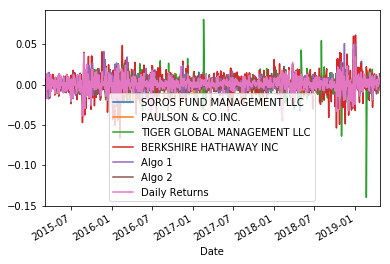

In [332]:
# Plot daily returns of all portfolios
dataframeall.plot()

In [333]:
# Calculate cumulative returns of all portfolios

dataframeallcuml=(1+dataframeall).cumprod()
dataframeallcuml

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072
2015-03-10,0.987379,0.997595,0.984595,0.979897,0.976921,0.983462,0.965415
2015-03-11,0.991340,1.002746,0.987855,0.978774,0.979846,0.984056,0.963564
2015-03-12,0.999533,1.013045,1.000813,0.989346,0.976971,0.995537,0.975706
2015-03-13,0.997037,1.011598,0.997113,0.981290,0.971673,0.990498,0.969779


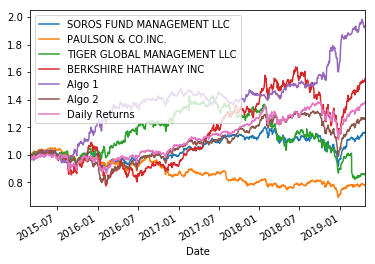

In [334]:
# Plot cumulative returns

dataframeallcuml.plot()

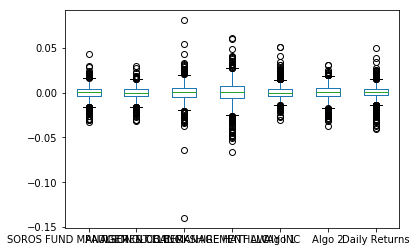

In [335]:
# Box plot to visually show risk
dataframeall.plot.box()

In [336]:
#Calculate the standard deviation for all portfolios

dataframestd = dataframeall.std()
dataframestd

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Daily Returns                  0.008554
dtype: float64

In [337]:
#Determine which portfolios are riskier than the S&P 500

dataframestd = dataframestd.sort_values(ascending=False)

print(dataframestd)

sp500std = dataframestd['Daily Returns']

sp500std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
Daily Returns                  0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64


0.008553731597758204

In [338]:
compare = dataframestd > sp500std 

compare


BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
Daily Returns                  False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

In [339]:
#Calculate the Annualized Standard Deviation
dataframestdannual = dataframestd * np.sqrt(252)
dataframestdannual

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
Daily Returns                  0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

In [340]:
# Calculate the daily standard deviations of all portfolios
dataframestddaily = dataframestdannual/252
dataframestddaily

BERKSHIRE HATHAWAY INC         0.000814
TIGER GLOBAL MANAGEMENT LLC    0.000686
Daily Returns                  0.000539
Algo 2                         0.000526
SOROS FUND MANAGEMENT LLC      0.000497
Algo 1                         0.000480
PAULSON & CO.INC.              0.000442
dtype: float64

In [341]:
# Calculate  the daily standard deviation of S&P 500
dailystddevsp = dataframestddaily['Daily Returns']
dailystddevsp

0.0005388344426015091

In [342]:
# Determine which portfolios are riskier than the S&P 500
compare

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
Daily Returns                  False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

In [343]:
# Calculate the annualized standard deviation (252 trading days)
dataframestdannual

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
Daily Returns                  0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

In [344]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
print(dataframeall.rolling(window=21).std())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
2015-03-10                        NaN                 NaN   
2015-03-11                        NaN                 NaN   
2015-03-12                        NaN                 NaN   
2015-03-13                        NaN                 NaN   
2015-03-16                        NaN                 NaN   
2015-03-17                        NaN                 NaN   
2015-03-18                        NaN                 NaN   
2015-03-19                        NaN                 NaN   
2015-03-20                        NaN                 NaN   
2015-03-23              

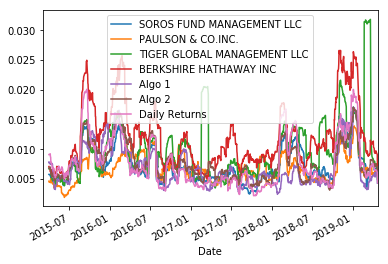

In [345]:
# Plot the rolling standard deviation
dataframeall.rolling(window=21).std().plot()

In [346]:
# Calculate the correlation
dataframecorr = dataframeall.corr()
dataframecorr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
Daily Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


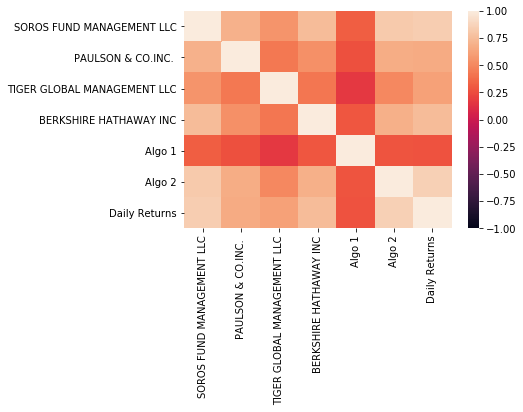

In [347]:
# Display de correlation matrix
sns.heatmap(dataframecorr, vmin=-1, vmax=1)

In [348]:
# Calculate covariance of a single portfolio
covbrk=dataframeall['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(dataframeall['Daily Returns'])

covbrk

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
2015-03-11         NaN
2015-03-12         NaN
2015-03-13         NaN
2015-03-16         NaN
2015-03-17         NaN
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31         NaN
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
                ...   
2019-03-12    0.000197
2019-03-13    0.000197
2019-03-14    0.000191
2019-03-15    0.000178
2019-03-18    0.000178
2019-03-19    0.000172
2019-03-20    0.000164
2019-03-21    0.000152
2019-03-22    0.000151
2019-03-25    0.000106
2019-03-26    0.000106
2019-03-27    0.000107
2019-0

In [349]:
# Calculate variance of S&P 500
varsp500 = dataframeall['Daily Returns'].rolling(window=60).var()
varsp500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
2015-03-11         NaN
2015-03-12         NaN
2015-03-13         NaN
2015-03-16         NaN
2015-03-17         NaN
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31         NaN
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
                ...   
2019-03-12    0.000152
2019-03-13    0.000152
2019-03-14    0.000145
2019-03-15    0.000137
2019-03-18    0.000137
2019-03-19    0.000132
2019-03-20    0.000127
2019-03-21    0.000119
2019-03-22    0.000112
2019-03-25    0.000074
2019-03-26    0.000074
2019-03-27    0.000075
2019-0

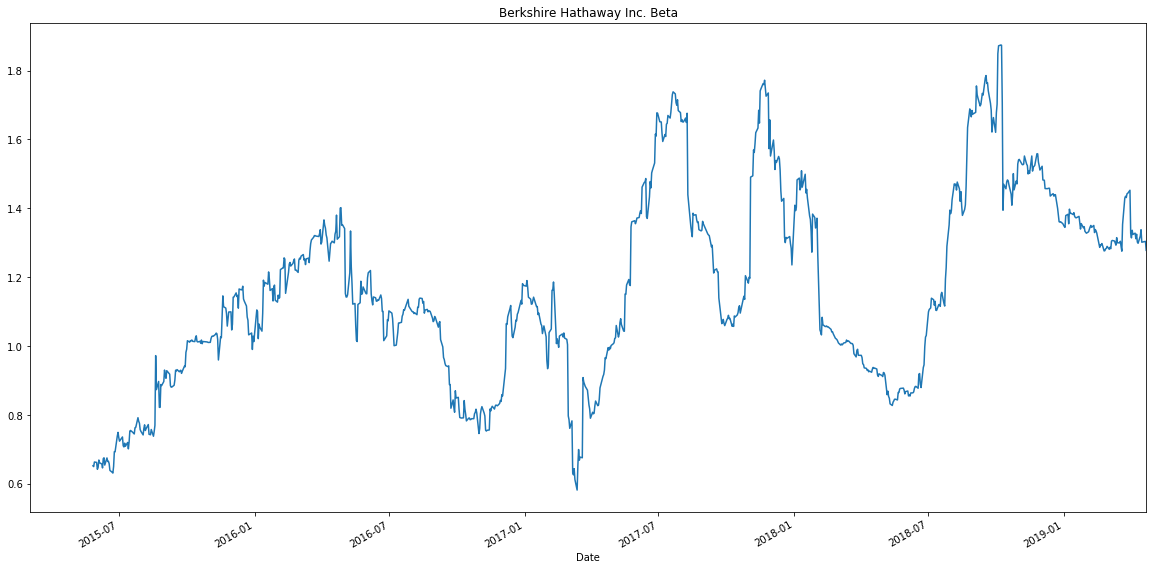

In [350]:
# Computing beta
brkbeta = covbrk/varsp500

brkbeta

brkbeta.plot(figsize=(20,10), title="Berkshire Hathaway Inc. Beta")

In [351]:
# Plot beta trend
brkbetadf = dataframeall['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(dataframeall['Daily Returns'])
#brkbetadf.dropna(inplace=True)
brkbetadf

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
2015-03-11         NaN
2015-03-12         NaN
2015-03-13         NaN
2015-03-16         NaN
2015-03-17         NaN
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31         NaN
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
                ...   
2019-03-12    0.000197
2019-03-13    0.000197
2019-03-14    0.000191
2019-03-15    0.000178
2019-03-18    0.000178
2019-03-19    0.000172
2019-03-20    0.000164
2019-03-21    0.000152
2019-03-22    0.000151
2019-03-25    0.000106
2019-03-26    0.000106
2019-03-27    0.000107
2019-0

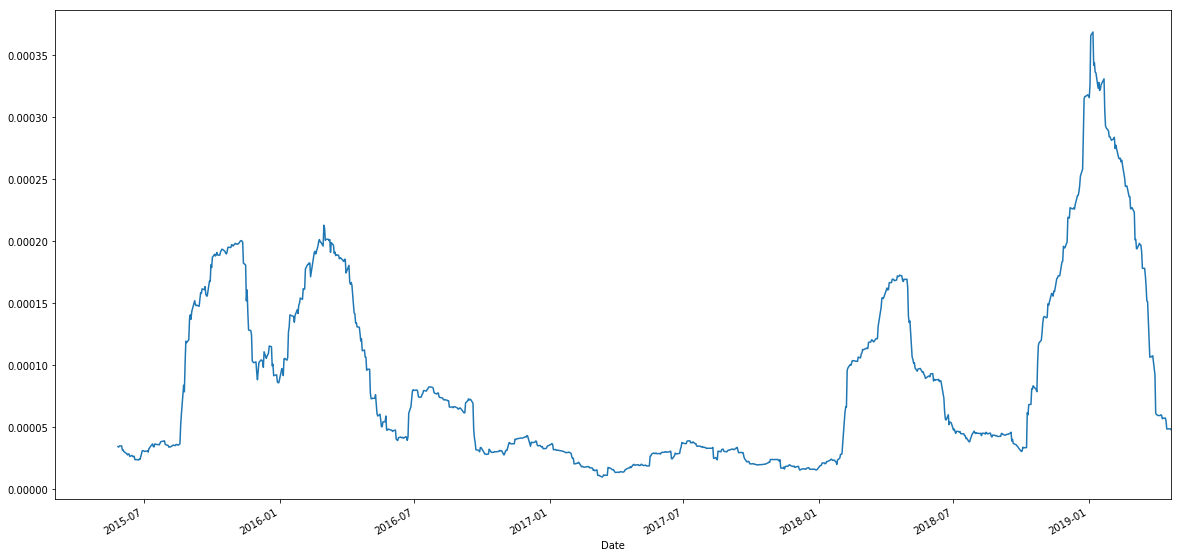

In [352]:
brkbetadf.plot(figsize=(20,10))

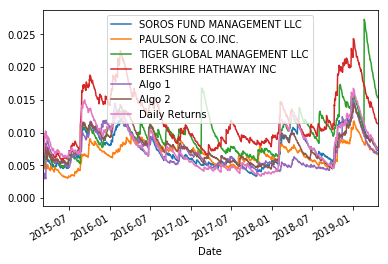

In [353]:
# Use `ewm` to calculate the rolling window
dataframeewm = dataframeall.ewm(halflife=21)
dataframeewm.std().plot()

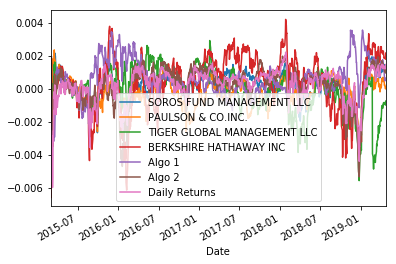

In [354]:
dataframeewm.mean().plot()

In [355]:
# Annualized Sharpe Ratios
dataframesharpe = ((dataframeall.mean()/dataframeall.std()))

dataframesharpe

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Algo 1                         0.086847
Algo 2                         0.031583
Daily Returns                  0.040837
dtype: float64

In [356]:
dataframesharpeann = ((dataframeall.mean() * 252)/(dataframeall.std() * np.sqrt(252)))
dataframesharpeann

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Daily Returns                  0.648267
dtype: float64

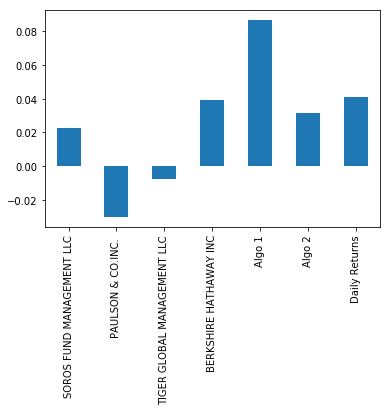

In [357]:
# Visualize the sharpe ratios as a bar plot
dataframesharpe.plot(kind="bar")

In [358]:
#Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

########
#
#
# yes, sharpe is higher, low stddev, slight neg beta, and algo1 outperforms daily s&p returns
#
#
########

In [359]:
# Reading data from 1st stock
googfile = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/goog_historical.csv")
dataframegoog = pd.read_csv(googfile, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
dataframegoog.head

<bound method NDFrame.head of            Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40
2019-05-02   GOOG  1162.61
2019-05-01   GOOG  1168.08
2019-04-30   GOOG  1188.48
2019-04-29   GOOG  1287.58
2019-04-26   GOOG  1272.18
2019-04-25   GOOG  1263.45
2019-04-24   GOOG  1256.00
2019-04-23   GOOG  1264.55
2019-04-22   GOOG  1248.84
2019-04-18   GOOG  1236.37
2019-04-17   GOOG  1236.34
2019-04-16   GOOG  1227.13
2019-04-15   GOOG  1221.10
2019-04-12   GOOG  1217.87
2019-04-11   GOOG  1204.62
2019-04-10   GOOG  1202.16
2019-04-09   GOOG  1197.25
2019-04-08   GOOG  1203.84
2019-04-05   GOOG  1207.15
2019-04-04   GOOG  1215.00
2019-04-03   GOOG  1205.92
2019-04-02   GOOG  1200.49
2019-04-01   GOOG  1194.43
2019-03-29   GOOG  1173.31
2019-03-28   GOOG  1168.49
...           ...      ...
2018-06-22   GOOG  1155.48
2018-06-21   GOOG  1157.66
2018-06-20   GOOG  1169.8

In [360]:
# Reading data from 2nd stock
aaplfile = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/aapl_historical.csv")
dataframeaapl = pd.read_csv(aaplfile, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [361]:
# Reading data from 3rd stock
costfile = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/cost_historical.csv")
dataframecost = pd.read_csv(costfile, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [362]:
# Combine all stocks in a single DataFrame
dataframeallbyrow = pd.concat([dataframegoog,dataframeaapl,dataframecost], axis ="rows",join="inner")

dataframeallbyrow

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
2019-05-02,GOOG,1162.61
2019-05-01,GOOG,1168.08
2019-04-30,GOOG,1188.48
2019-04-29,GOOG,1287.58


In [363]:
dataframegoogdailyreturn = dataframegoog["NOCP"].pct_change()

dataframegoogdailyreturn


Trade DATE
2019-05-09         NaN
2019-05-08    0.003347
2019-05-07    0.006714
2019-05-06    0.013023
2019-05-03   -0.003355
2019-05-02   -0.019226
2019-05-01    0.004705
2019-04-30    0.017465
2019-04-29    0.083384
2019-04-26   -0.011960
2019-04-25   -0.006862
2019-04-24   -0.005897
2019-04-23    0.006807
2019-04-22   -0.012423
2019-04-18   -0.009985
2019-04-17   -0.000024
2019-04-16   -0.007449
2019-04-15   -0.004914
2019-04-12   -0.002645
2019-04-11   -0.010880
2019-04-10   -0.002042
2019-04-09   -0.004084
2019-04-08    0.005504
2019-04-05    0.002750
2019-04-04    0.006503
2019-04-03   -0.007473
2019-04-02   -0.004503
2019-04-01   -0.005048
2019-03-29   -0.017682
2019-03-28   -0.004108
                ...   
2018-06-22    0.027267
2018-06-21    0.001887
2018-06-20    0.010521
2018-06-19   -0.001522
2018-06-18    0.004623
2018-06-15   -0.018066
2018-06-14   -0.000122
2018-06-13   -0.015042
2018-06-12    0.003992
2018-06-11   -0.008189
2018-06-08   -0.008071
2018-06-07    0.002668


In [364]:
dataframeaapldailyreturn= dataframeaapl["NOCP"].pct_change()


In [365]:
dataframecostdailyreturn= dataframecost["NOCP"].pct_change()


In [366]:
combinedgoog = pd.concat([dataframegoog,dataframegoogdailyreturn], axis ="columns",join="inner")


In [367]:
combinedaapl = pd.concat([dataframeaapl,dataframeaapldailyreturn], axis ="columns",join="inner")


In [368]:
combinedcost = pd.concat([dataframecost,dataframecostdailyreturn], axis ="columns",join="inner")


In [369]:
originaldatacombined = pd.concat([dataframegoog,dataframeaapl,dataframecost], axis ="columns",join="inner")


In [370]:
dailyreturnscombined = pd.concat([dataframegoogdailyreturn,dataframeaapldailyreturn,dataframecostdailyreturn], axis ="columns",join="inner")
dailyreturnscombined

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890
2019-05-01,0.004705,0.006550,-0.004533
2019-04-30,0.017465,-0.046789,0.016309
2019-04-29,0.083384,0.019634,-0.005091


In [371]:
# Combine all stocks in a single DataFrame
everythingcombined = pd.concat([combinedgoog,combinedaapl,combinedcost], axis ="columns",join="inner")
everythingcombined

,Symbol,NOCP,NOCP,Symbol,NOCP,NOCP,Symbol,NOCP,NOCP
Trade DATE,,,,,,,,,
2019-05-09,GOOG,1162.38,NaN,AAPL,200.72,NaN,COST,243.47,NaN
2019-05-08,GOOG,1166.27,0.003347,AAPL,202.90,0.010861,COST,241.34,-0.008749
2019-05-07,GOOG,1174.10,0.006714,AAPL,202.86,-0.000197,COST,240.18,-0.004806
2019-05-06,GOOG,1189.39,0.013023,AAPL,208.48,0.027704,COST,244.23,0.016862
2019-05-03,GOOG,1185.40,-0.003355,AAPL,211.75,0.015685,COST,244.62,0.001597
2019-05-02,GOOG,1162.61,-0.019226,AAPL,209.15,-0.012279,COST,242.69,-0.007890
2019-05-01,GOOG,1168.08,0.004705,AAPL,210.52,0.006550,COST,241.59,-0.004533
2019-04-30,GOOG,1188.48,0.017465,AAPL,200.67,-0.046789,COST,245.53,0.016309
2019-04-29,GOOG,1287.58,0.083384,AAPL,204.61,0.019634,COST,244.28,-0.005091


In [372]:
# Reorganize portfolio data by having a column per symbol
# Calculate daily returns
columnsnames = ['GOOG Close','AAPL Close','COST Close']

dailyreturnscombined.columns=["GOOG Close","AAPL Close","COST Close"]
dailyreturnscombined



,GOOG Close,AAPL Close,COST Close
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890
2019-05-01,0.004705,0.006550,-0.004533
2019-04-30,0.017465,-0.046789,0.016309
2019-04-29,0.083384,0.019634,-0.005091


In [373]:
dailyreturnscombined.sort_index(inplace=True)

# Drop NAs
dailyreturnscombined.dropna(inplace=True)

# Display sample data
dailyreturnscombined.head()

dailyreturnscombined

,GOOG Close,AAPL Close,COST Close
Trade DATE,,,
2018-05-11,-0.001763,0.002339,-0.000613
2018-05-14,0.019431,0.009172,0.002046
2018-05-15,-0.002348,-0.009246,-0.016255
2018-05-16,0.002948,0.006364,-0.004459
2018-05-17,0.011469,0.003650,0.003217
2018-05-18,-0.012246,-0.007035,-0.003306
2018-05-21,0.009208,0.002511,0.003267
2018-05-22,-0.009225,-0.006371,0.004189
2018-05-23,0.000417,0.001116,-0.003771


In [374]:
# Reset Date index

In [375]:
# Set weights
weights = [1/3, 1/3, 1/3]
sampleportfolioval = 10000

# Calculate portfolio return
threeportreturns = dailyreturnscombined.dot(weights)
threeportreturns

Trade DATE
2018-05-11   -0.000012
2018-05-14    0.010216
2018-05-15   -0.009283
2018-05-16    0.001618
2018-05-17    0.006112
2018-05-18   -0.007529
2018-05-21    0.004995
2018-05-22   -0.003802
2018-05-23   -0.000746
2018-05-24    0.001240
2018-05-25    0.008773
2018-05-29   -0.006466
2018-05-30   -0.001803
2018-05-31   -0.014303
2018-06-01   -0.011054
2018-06-04   -0.001346
2018-06-05   -0.000033
2018-06-06   -0.003322
2018-06-07    0.002003
2018-06-08   -0.003077
2018-06-11   -0.005168
2018-06-12    0.005350
2018-06-13   -0.006830
2018-06-14   -0.000118
2018-06-15   -0.004051
2018-06-18    0.004896
2018-06-19   -0.002676
2018-06-20    0.002233
2018-06-21   -0.000198
2018-06-22    0.013098
                ...   
2019-03-27   -0.001650
2019-03-28   -0.004794
2019-03-29   -0.010941
2019-04-01   -0.001344
2019-04-02   -0.006492
2019-04-03   -0.005689
2019-04-04   -0.002042
2019-04-05   -0.005126
2019-04-08    0.005029
2019-04-09   -0.004172
2019-04-10    0.008156
2019-04-11   -0.004471


In [376]:
threeportreturnstotal = (1+threeportreturns).cumprod()-1
threeportreturnstotal


Trade DATE
2018-05-11   -0.000012
2018-05-14    0.010204
2018-05-15    0.000826
2018-05-16    0.002445
2018-05-17    0.008572
2018-05-18    0.000978
2018-05-21    0.005978
2018-05-22    0.002153
2018-05-23    0.001406
2018-05-24    0.002648
2018-05-25    0.011444
2018-05-29    0.004904
2018-05-30    0.003092
2018-05-31   -0.011255
2018-06-01   -0.022185
2018-06-04   -0.023501
2018-06-05   -0.023533
2018-06-06   -0.026776
2018-06-07   -0.024827
2018-06-08   -0.027828
2018-06-11   -0.032852
2018-06-12   -0.027678
2018-06-13   -0.034319
2018-06-14   -0.034433
2018-06-15   -0.038345
2018-06-18   -0.033637
2018-06-19   -0.036223
2018-06-20   -0.034071
2018-06-21   -0.034262
2018-06-22   -0.021613
                ...   
2019-03-27   -0.077452
2019-03-28   -0.081875
2019-03-29   -0.091920
2019-04-01   -0.093141
2019-04-02   -0.099028
2019-04-03   -0.104154
2019-04-04   -0.105983
2019-04-05   -0.110566
2019-04-08   -0.106094
2019-04-09   -0.109823
2019-04-10   -0.102564
2019-04-11   -0.106576


In [377]:
# Join your returns DataFrame to the original returns DataFrame
# Only compare dates where return data exists for all the stocks (drop NaNs)

allall = pd.concat([threeportreturnstotal,dataframeall], axis ="columns",join="inner")
allall.dropna(inplace=True)


allall.columns=['threeportreturnstotal','SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','Daily Returns']

allall


,threeportreturnstotal,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
2018-05-11,-0.000012,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708
2018-05-14,0.010204,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,0.000826,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.002445,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,0.008572,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,0.000978,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
2018-05-21,0.005978,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387
2018-05-22,0.002153,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003136
2018-05-23,0.001406,-0.000899,-0.000659,0.005062,0.011108,-0.002093,0.001962,0.003248
2018-05-24,0.002648,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,-0.002023


In [378]:
# Calculate the annualized `std`

allallstd = allall.std()
allallstdannual = allallstd * np.sqrt(252)
allallstdannual

threeportreturnstotal          1.044140
SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
Algo 1                         0.133423
Algo 2                         0.139262
Daily Returns                  0.151739
dtype: float64

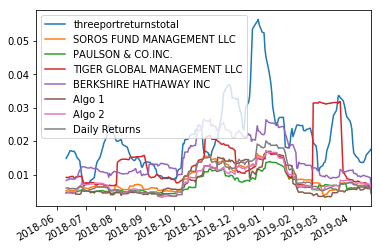

In [379]:
# Calculate rolling standard deviation
rollingstdallall= allall.rolling(window=21).std()

# Plot rolling standard deviation

rollingstdallall.plot()


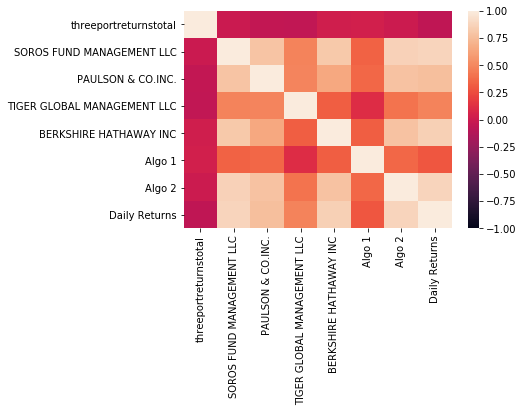

In [380]:
# Calculate and plot the correlation
allallcorr = allall.corr()

sns.heatmap(allallcorr, vmin=-1, vmax=1)


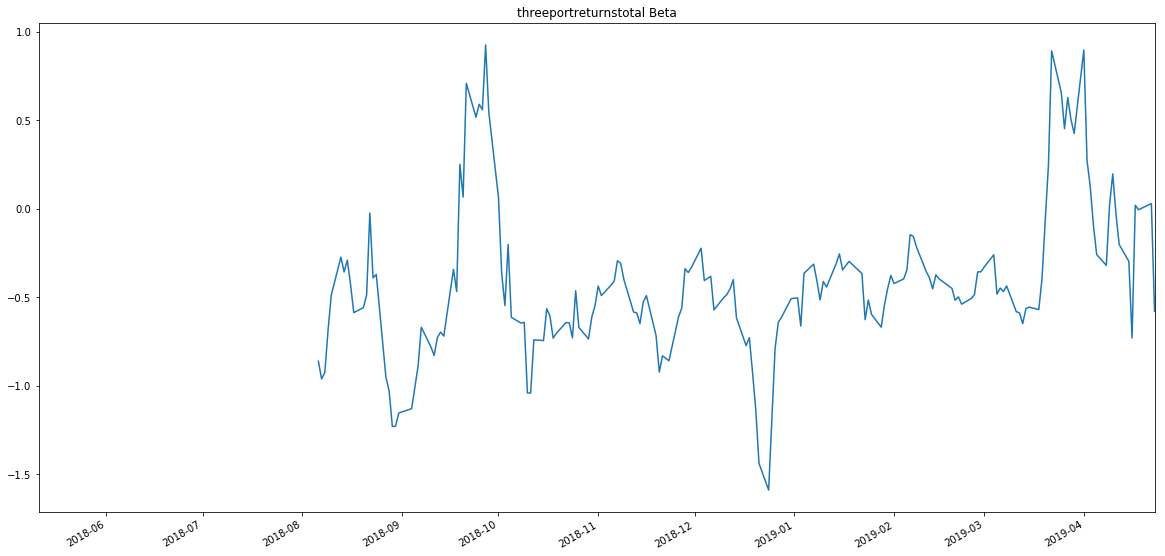

In [381]:
# Calculate and plot Beta
covthreep=allall['threeportreturnstotal'].rolling(window=60).cov(allall['Daily Returns'])
covthreep

varsp500 = allall['Daily Returns'].rolling(window=60).var()
varsp500

threepbeta = covthreep/varsp500
threepbeta

threepbeta.plot(figsize=(20,10), title="threeportreturnstotal Beta")

In [382]:
# Calculate Annualzied Sharpe Ratios
allallsharpeann = ((allall.mean() * 252)/(allall.std() * np.sqrt(252)))
allallsharpeann


threeportreturnstotal         -10.694894
SOROS FUND MANAGEMENT LLC       0.395449
PAULSON & CO.INC.               0.267115
TIGER GLOBAL MANAGEMENT LLC    -1.019946
BERKSHIRE HATHAWAY INC          0.141691
Algo 1                          2.034208
Algo 2                          0.082577
Daily Returns                   0.595486
dtype: float64

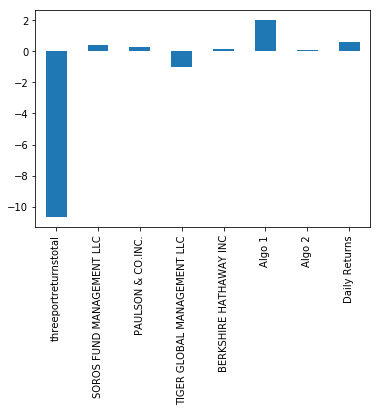

In [383]:
# Visualize the sharpe ratios as a bar plot

allallsharpeann.plot(kind="bar")


In [384]:
# How does your portfolio do?¶Write your answer here!
#
#
#    clearly, not well. based on the Sharpe ratio alone. oh well
#
#
###################
